# CDS: Numerical Methods Assignments

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted via the Jupyter Hub.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Submission

1. Name all team members in the the cell below
2. make sure everything runs as expected
3. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
4. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
5. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
6. submit your solutions  **in time (before the deadline)**

## Composite Numerical Integration: Trapezoid and Simpson Rules

In the following we will implement the composite trapezoid and Simpson rules to calculate definite integrals. These rules are defined by

\begin{align}
	\int_a^b \, f(x)\, dx &\approx \frac{h}{2} \left[ f(a) + 2 \sum_{j=1}^{n-1} f(x_j) + f(b) \right] 
                          &\text{trapezoid} \\
                          &\approx \frac{h}{3} \left[ f(a) + 2 \sum_{j=1}^{n/2-1} f(x_{2j}) + 4 \sum_{j=1}^{n/2} f(x_{2j-1}) + f(b) \right]	 
                          &\text{Simpson}
\end{align}
    
with $a = x_0 < x_1 < \dots < x_{n-1} < x_n = b$ and $x_k = a + kh$. Here $k = 0, \dots, n$ and $h = (b-a) / n$ is the step size.

In [1]:
import numpy as np
import scipy.integrate
from matplotlib import pyplot as plt

# And for printing the lambdas:
import inspect

### Task 1

Implement both integration schemes as Python functions $\text{trapz(yk, dx)}$ and $\text{simps(yk, dx)}$. The argument $\text{yk}$ is an array of length $n+1$ representing $y_k = f(x_k)$ and $\text{dx}$ is the step size $h$. Compare your results with Scipy's functions $\text{scipy.integrate.trapz(yk, xk)}$ and $\text{scipy.integrate.simps(yk, xk)}$ for a $f(x_k)$ of your choice.

Try both even and odd $n$. What do you see? Why?

Hint: go to the Scipy documentation. How are even and odd $n$ handled there?

In [2]:
def trapz(yk, dx):
    """
    Return integration estimate for curve yk with steps dx
    using the trapezoid algorithm.
    """
    
    a, b = yk[0], yk[-1]
    h = dx
    integral = h/2*(a + 2*np.sum(yk[1:-1]) + b)
    return integral
    
def simps(yk, dx):
    """
    Return integration estimate for curve yk with steps dx
    using Simpson's algorithm.
    """
    
    a, b = yk[0], yk[-1]
    h = dx
    # Instead of summing over something with n/2, we use step size 2,
    # thus avoiding any issues with 2 ∤ n.
    integral = h/3*(a + 2*np.sum(yk[2:-1:2]) + 4*np.sum(yk[1:-1:2]) + b)
    return integral

In [3]:
def compare_integration(f, a, b, n):
    """
    Prints an analysis of integration estimates to function f(x)
    over interval [a,b] in n steps using both the trapezoid and Simpson's
    algorithm, self-implemented and Scipy implemented.
    """
    
    h    = (b - a)/n
    xk   = np.linspace(a, b, n + 1)
    yk   = f(xk)
    
    print("For function", inspect.getsource(f))
    print("for boundaries a =", a, ", b =", b, "and steps n =", n, "the algorithms say:")
    print("trapezoid:\t\t", trapz(yk, h))
    print("Simpson:\t\t", simps(yk, h))
    print("scipy.integrate.trapz:\t", scipy.integrate.trapz(yk, xk))
    print("scipy.integrate.simps:\t", scipy.integrate.simps(yk, xk))
    print()

In [4]:
# We need a function to integrate, so here we go.
f = lambda x: x**2

n    = 100001
a, b = 0, 1

In [5]:
compare_integration(f, a, b, n)
compare_integration(f, a, b, n + 1)

For function f = lambda x: x**2

for boundaries a = 0 , b = 1 and steps n = 100001 the algorithms say:
trapezoid:		 0.33333333334999976
Simpson:		 0.3333300000666658
scipy.integrate.trapz:	 0.33333333334999965
scipy.integrate.simps:	 0.3333333333333335

For function f = lambda x: x**2

for boundaries a = 0 , b = 1 and steps n = 100002 the algorithms say:
trapezoid:		 0.3333333333499994
Simpson:		 0.33333333333333337
scipy.integrate.trapz:	 0.3333333333499993
scipy.integrate.simps:	 0.3333333333333333



### Task 2

Implement at least one test function for each of your integration functions.

In [6]:
# In the comparison of n even and n odd, and the testing of the integrations,
# we have already tested the functions, but as it is asked, here we go again.

def test_trapz():
    fun  = lambda x: x**3 + 6*x
    a, b = 2, 16
    n    = 82198
    
    h    = (b - a)/n
    xk   = np.linspace(a, b, n + 1)
    yk   = f(xk)

    trapz_our   = trapz(yk, h)
    trapz_scipy = scipy.integrate.trapz(yk, xk)
    
    print("For function f(x) = x^3 + 6x")
    print("for boundaries a =", a, ", b =", b, "and steps n =", n, "the algorithms say:")
    print("trapezoid:\t\t", trapz_our)
    print("scipy.integrate.trapz:\t", trapz_scipy)
    print("with difference trapz(yk, h) - scipy.integrate.trapz(yk, xk) =", trapz_our - trapz_scipy)
    print()
    
def test_simps():
    fun  = lambda x: -x**3 + 6*x
    a, b = 2, 17
    n    = 82228
    
    h    = (b - a)/n
    xk   = np.linspace(a, b, n + 1)
    yk   = f(xk)

    simps_our   = simps(yk, h)
    simps_scipy = scipy.integrate.simps(yk, xk)
    
    print("For function f(x) = -x^3 + 6x")
    print("for boundaries a =", a, ", b =", b, "and steps n =", n, "the algorithms say:")
    print("Simpson:\t\t", simps_our)
    print("scipy.integrate.simps:\t", simps_scipy)
    print("with difference simps(yk, h) - scipy.integrate.simps(yk, xk) =", simps_our - simps_scipy)
    print()
    
test_trapz()
test_simps()

For function f(x) = x^3 + 6x
for boundaries a = 2 , b = 16 and steps n = 82198 the algorithms say:
trapezoid:		 1362.6666667343538
scipy.integrate.trapz:	 1362.6666667343543
with difference trapz(yk, h) - scipy.integrate.trapz(yk, xk) = -4.547473508864641e-13

For function f(x) = -x^3 + 6x
for boundaries a = 2 , b = 17 and steps n = 82228 the algorithms say:
Simpson:		 1635.0
scipy.integrate.simps:	 1635.0000000000002
with difference simps(yk, h) - scipy.integrate.simps(yk, xk) = -2.2737367544323206e-13



### Task 3

Study the accuracy of these integration routines by calculating the following integrals for a variety of step sizes $h$:

- $\int_0^1 \, x\, dx$
- $\int_0^1 \, x^2\, dx$
- $\int_0^1 \, x^\frac{1}{2}\, dx$

The integration error is defined as the difference (not the absolute difference) between your numerical results and the exact results. Plot the integration error as a function of $h$ for both integration routines and all listed functions. Comment on the comparison between both integration routines. Does the sign of the error match your expectations? Why?

In [7]:
f1 = lambda x: x
f2 = lambda x: x**2
f3 = lambda x: x**(1/2)

a, b = 0, 1
h_list = np.logspace(-3, 1, 50)

f1_simps = np.zeros(len(h_list))
f1_trapz = np.zeros(len(h_list))
f2_simps = np.zeros(len(h_list))
f2_trapz = np.zeros(len(h_list))
f3_simps = np.zeros(len(h_list))
f3_trapz = np.zeros(len(h_list))

for i in range(len(h_list)):
    h    = h_list[i]
    xk   = np.arange(a, b, h)
    n    = len(xk)
    
    # The repetition could be reduced, but we deem that unnecessary.
    f1_simps[i] = simps(f1(xk), h)
    f1_trapz[i] = trapz(f1(xk), h)
    f2_simps[i] = simps(f2(xk), h)
    f2_trapz[i] = trapz(f1(xk), h)
    f3_simps[i] = simps(f2(xk), h)
    f3_trapz[i] = trapz(f1(xk), h)

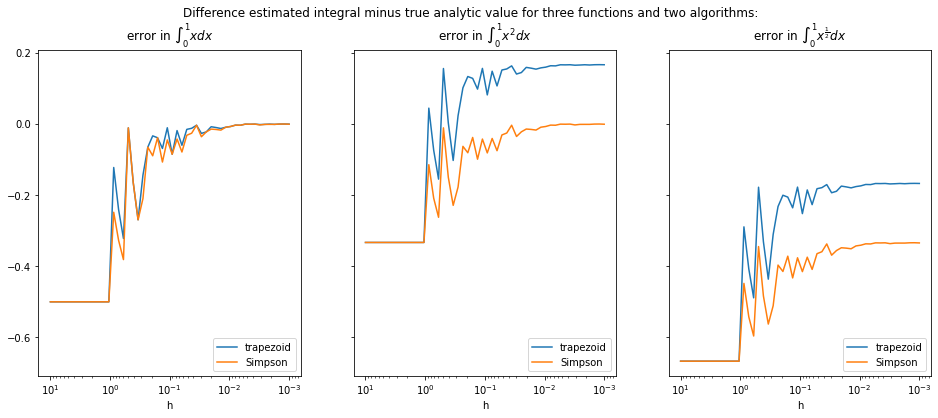

In [8]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,6))

fig.suptitle("Difference estimated integral minus true analytic value for three functions and two algorithms:")

ax[0].set_xlabel("h")
ax[1].set_xlabel("h")
ax[2].set_xlabel("h")

# We only need to set the scale and direction for one graph,
# as we set sharex.
ax[0].set_xscale("log")
ax[0].invert_xaxis()

ax[0].set_title(r"error in $\int_0^1xdx$")
ax[0].plot(h_list, f1_trapz - 1/2, label="trapezoid")
ax[0].plot(h_list, f1_simps - 1/2, label="Simpson")
ax[0].legend(loc="lower right")

ax[1].set_title(r"error in $\int_0^1x^2dx$")
ax[1].plot(h_list, f2_trapz - 1/3, label="trapezoid")
ax[1].plot(h_list, f2_simps - 1/3, label="Simpson")
ax[1].legend(loc="lower right")

ax[2].set_title(r"error in $\int_0^1x^\frac{1}{2}dx$")
ax[2].plot(h_list, f3_trapz - 2/3, label="trapezoid")
ax[2].plot(h_list, f3_simps - 2/3, label="Simpson")
ax[2].legend(loc="lower right")

fig.show()

Somehow, the shape of the error functions seems to be similar, with peaks a similar pattern, for the three functions and the the algorithms.
The errors to the Simpson algorithm seems to be negative, thus the integration function gives lower estimates to the integrals.
This cannot be said about the trapezoid algorithm.
The trapezoid algorithms has the same trend, but becomes larger and positive in the latter two functions.
For Simpson's algorithm, as desired, over the range of decreasing $h$, the error decreases converging to around zero